In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [3]:
cols = ['State', 'PIT Count']
housing = pd.read_csv('Housing.csv', usecols = cols, low_memory=False)
housing = housing.groupby('State').sum()
housing = housing.reset_index()

In [4]:
housing = housing.reset_index(drop=True)
housing

,State,PIT Count
0,AK,2546.0
1,AL,6416.0
2,AR,2658.0
3,AZ,16470.0
4,CA,113040.0
5,CO,14133.0
6,CT,10638.0
7,DC,18039.0
8,DE,1834.0
9,FL,39714.0


In [5]:
states = pd.read_csv('states.csv')
#states

In [6]:
States = housing.merge(states, left_on = 'State', right_on = 'Abbreviation', how = 'inner')
States
#States.columns
States = States.drop(columns = ['State_x', 'Abbreviation'])
States = States.rename(columns = {"State_y": 'State'})
States

,PIT Count,State
0,2546.0,Alaska
1,6416.0,Alabama
2,2658.0,Arkansas
3,16470.0,Arizona
4,113040.0,California
5,14133.0,Colorado
6,10638.0,Connecticut
7,18039.0,District of Columbia
8,1834.0,Delaware
9,39714.0,Florida


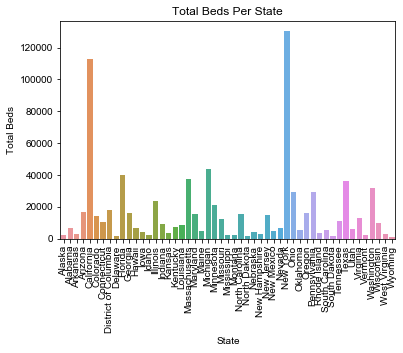

In [7]:
graph = sns.barplot(x='State', y='PIT Count', data=States);
graph.set_xticklabels(graph.get_xticklabels(), rotation=90)
plt.title('Total Beds Per State')
plt.ylabel('Total Beds')
plt.xlabel('State')
sns.set(rc={'figure.figsize':(15,8.27)})

In [8]:
cols2 = ['table with row headers in column A and column headers in rows 3 through 4. (leading dots indicate sub-parts)', 'Unnamed: 9']
state_pop = pd.read_csv('state pop.csv', usecols = cols2)
state_pop = state_pop.rename(columns = {'table with row headers in column A and column headers in rows 3 through 4. (leading dots indicate sub-parts)': 'State', 'Unnamed: 9': 'Population'})

In [9]:
state_pop.head(20)

,State,Population
0,Table 1. Annual Estimates of the Resident Popu...,NaN
1,Geographic Area,NaN
2,NaN,2016
3,United States,"323,127,513"
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,.Alabama,"4,863,300"
9,.Alaska,"741,894"


In [10]:
state_pop = state_pop.dropna()
state_pop = state_pop.drop([3, 60]).reset_index(drop = True)

In [11]:
state_pop['State'] = state_pop['State'].str.replace('.','', regex=True)

In [12]:
pop_norm = state_pop.merge(States, left_on = 'State', right_on = 'State', how = 'inner')
pop_norm['Population'] = pop_norm['Population'].str.replace(',','', regex=True)
pop_norm = pop_norm.astype({'Population': 'float64'})
pop_norm.dtypes

State          object
Population    float64
PIT Count     float64
dtype: object

In [13]:
pop_norm['Normalized Population'] = pop_norm['PIT Count'] / pop_norm['Population']
pop_norm['Beds Per 100000 People'] = pop_norm['Normalized Population'] * 100000

In [14]:
pop_norm

,State,Population,PIT Count,Normalized Population,Beds Per 100000 People
0,Alabama,4863300.0,6416.0,0.001319,131.926881
1,Alaska,741894.0,2546.0,0.003432,343.175710
2,Arizona,6931071.0,16470.0,0.002376,237.625614
3,Arkansas,2988248.0,2658.0,0.000889,88.948441
4,California,39250017.0,113040.0,0.002880,287.999875
5,Colorado,5540545.0,14133.0,0.002551,255.083209
6,Connecticut,3576452.0,10638.0,0.002974,297.445625
7,Delaware,952065.0,1834.0,0.001926,192.633906
8,District of Columbia,681170.0,18039.0,0.026482,2648.237591
9,Florida,20612439.0,39714.0,0.001927,192.670067


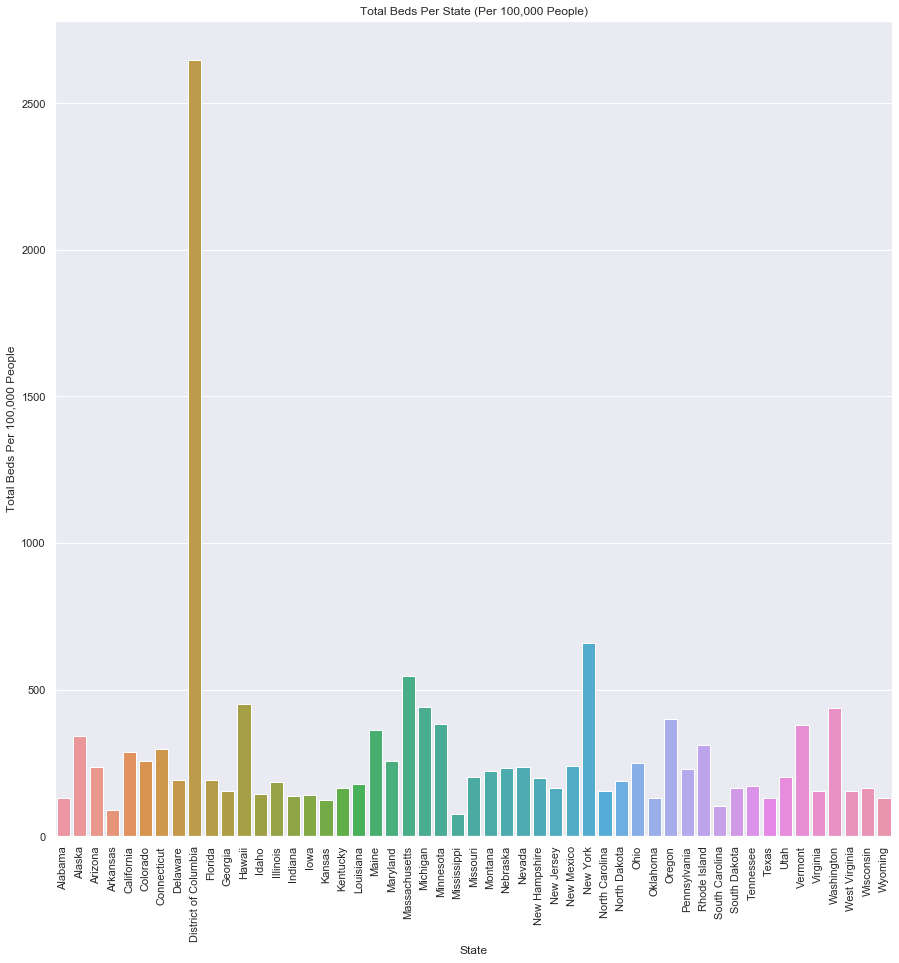

In [16]:
graph = sns.barplot(x='State', y='Beds Per 100000 People', data=pop_norm);
graph.set_xticklabels(graph.get_xticklabels(), rotation=90)
plt.title('Total Beds Per State (Per 100,000 People)')
plt.ylabel('Total Beds Per 100,000 People')
plt.xlabel('State')
sns.set(rc={'figure.figsize':(15,15)})

In [134]:
pop_norm.to_csv('pop_norm.csv')